# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

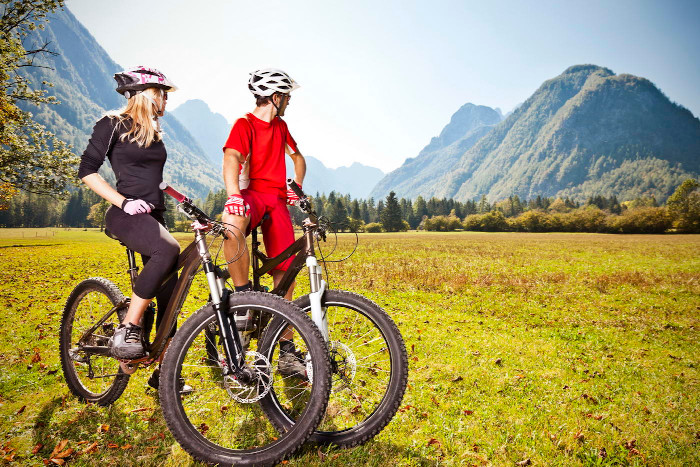

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv("day.csv")
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
            'atemp', 'hum', 'windspeed', 'cnt']]
data.sample(5)

season  mnth  holiday  weekday  workingday  weathersit      temp  \
4         1     1        0        3           1           1  0.226957   
166       2     6        0        4           1           2  0.628333   
380       1     1        1        1           0           1  0.190000   
452       2     3        0        3           1           1  0.484167   
244       3     9        0        5           1           2  0.643333   

        atemp       hum  windspeed   cnt  
4    0.229270  0.436957   0.186900  1600  
166  0.595346  0.688333   0.206471  3767  
380  0.190663  0.522500   0.231358  2298  
452  0.470950  0.481250   0.291671  5698  
244  0.604808  0.727083   0.139929  4727

In [98]:
data.query('holiday.notnull()')

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed   cnt  temp_upd   hum_upd  windspeed_upd  
0    0.363625  0.805833   0.160446   985  0.118451 -0.805833      -0.160446  
1    0.353739  0.696087   0.248539   801  0.132116 -0.696087      -0.248539  
2    0.189405  0.437273   0.248309  1349  0.038559 -0.437273      -0.248309  
3    0.212122  0.590435   0.160296  1562  0.040000 -0.590435      -0.160296  
4    0.229270  0.436957   0.186900  1600  0.051509 -0.436957      -0.186900  
..        ...       ...        ...   ...       ...       ...            ...  
726  0.226642  0.652917   0.350133  2114  0.064601 -0.652917      -0.350133  
727  0.255046  0.590000   0.155471  3095  0.064178 -0.590000      -0.155471  
728  0.242400  0.752917   0.124383  1341  0.064178 -0.752917      -0.124383  
729  0.231700  0.483333   0.350754  1796  0.065451 -0.483333      -0.350754  
730  0.223487  0.577500   0.154846  2729  0.046584 -0.577500      -0.154846  

[731 rows x 14 columns]

In [5]:
train, test = train_test_split(data, test_size=0.25)
train.shape, test.shape

((548, 11), (183, 11))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

Разобьём данные по сезонам года:

In [7]:
winter = train[train['season'] == 1]
spring = train[train['season'] == 2]
summer = train[train['season'] == 3]
autumn = train[train['season'] == 4]

Посмотрим на зависимость от влажности:

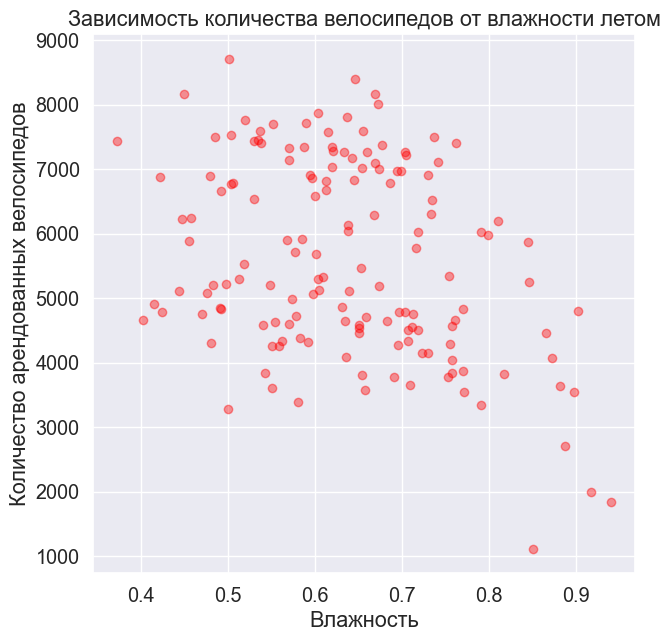

In [8]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(summer['hum'], summer['cnt'], color='r', alpha=0.4)

    plt.title("Зависимость количества велосипедов от влажности летом")
    plt.xlabel("Влажность")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Зависимость похожа на что-то вроде $-x$. Попробуем сделать более линейную:

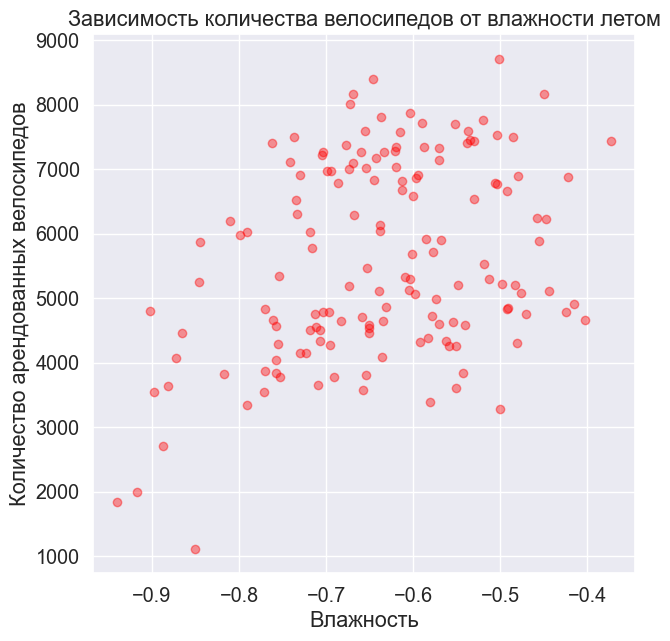

In [9]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(-summer['hum'], summer['cnt'], color='r', alpha=0.4)

    plt.title("Зависимость количества велосипедов от влажности летом")
    plt.xlabel("Влажность")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Действительно, теперь сильно лучше, ведь для линейной регрессии очень важна линейная зависимость.

Наблюдая за другими сезонами, можно сделать вывод, что получающиеся функциональные зависимости приблизительно похожи:

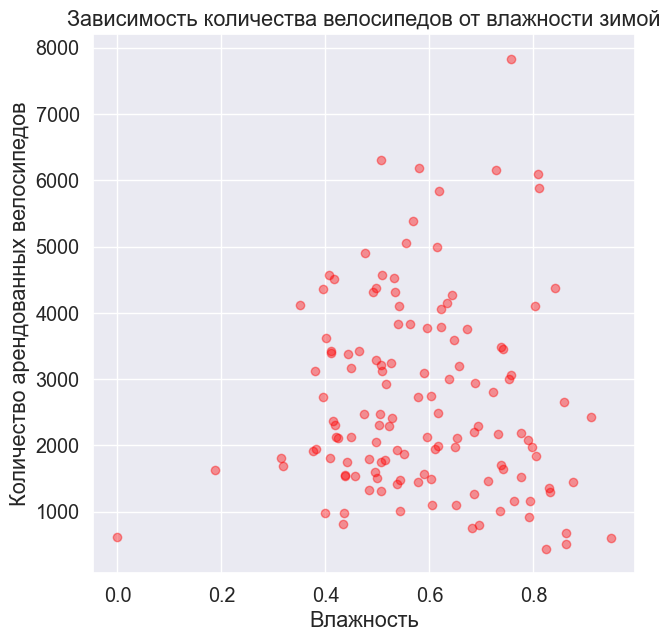

In [10]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(winter['hum'], winter['cnt'], color='r', alpha=0.4)

    plt.title("Зависимость количества велосипедов от влажности зимой")
    plt.xlabel("Влажность")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

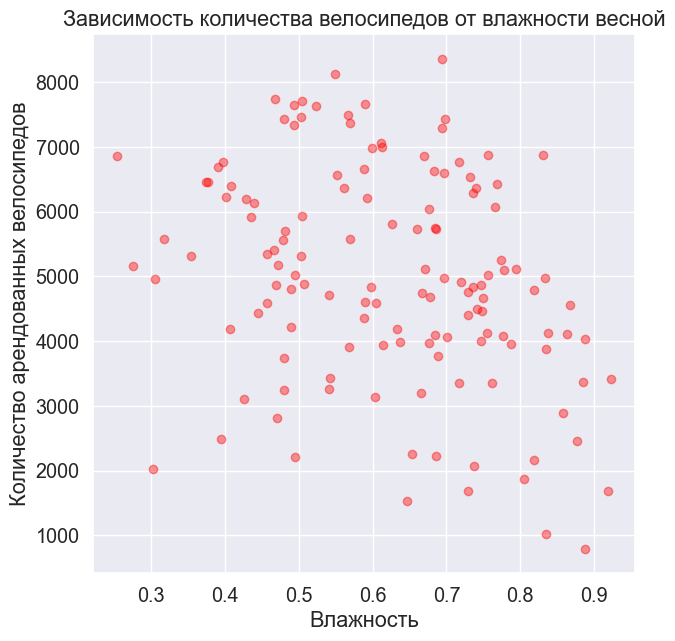

In [11]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(spring['hum'], spring['cnt'], color='r', alpha=0.4)

    plt.title("Зависимость количества велосипедов от влажности весной")
    plt.xlabel("Влажность")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

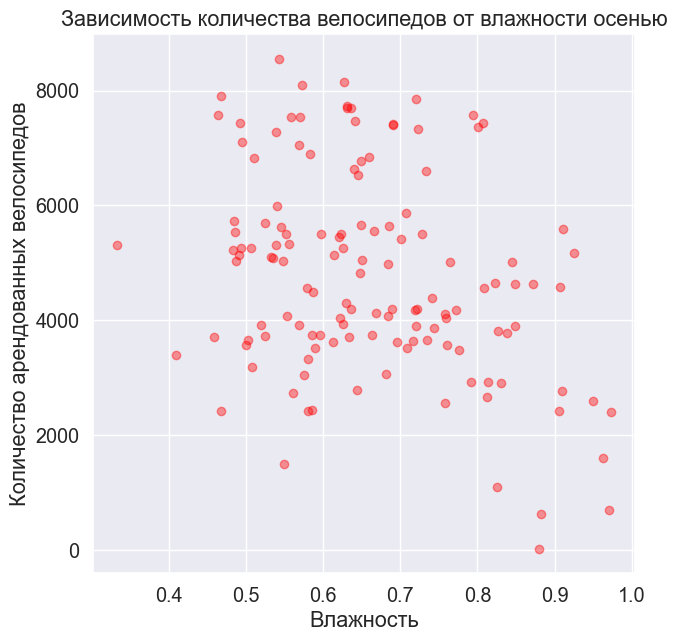

In [12]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(autumn['hum'], autumn['cnt'], color='r', alpha=0.4)

    plt.title("Зависимость количества велосипедов от влажности осенью")
    plt.xlabel("Влажность")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Поэтому, предлагаю дальнейшие зависимости рассматривать на примере какого-нибудь одного времени года, например, осени.

Посмотрим на зависимость от силы ветра:

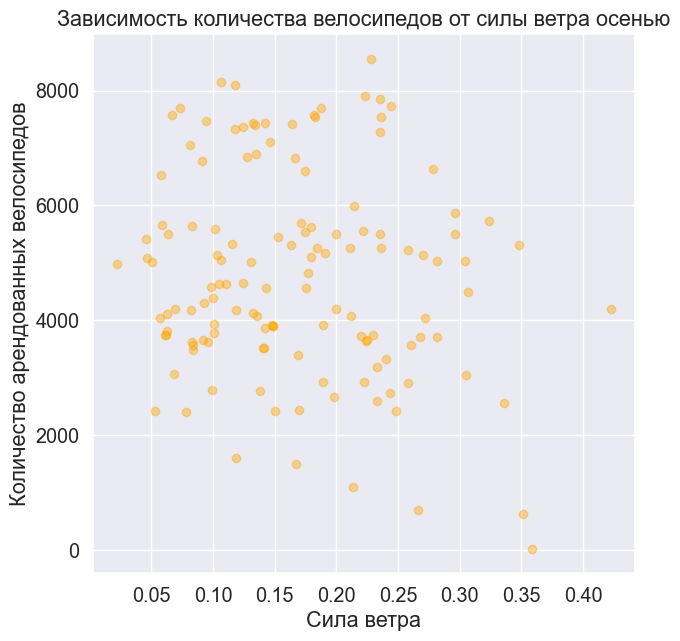

In [13]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(autumn['windspeed'], autumn['cnt'], color='orange', alpha=0.4)

    plt.title("Зависимость количества велосипедов от силы ветра осенью")
    plt.xlabel("Сила ветра")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Думаю, также можно взять $-x$:

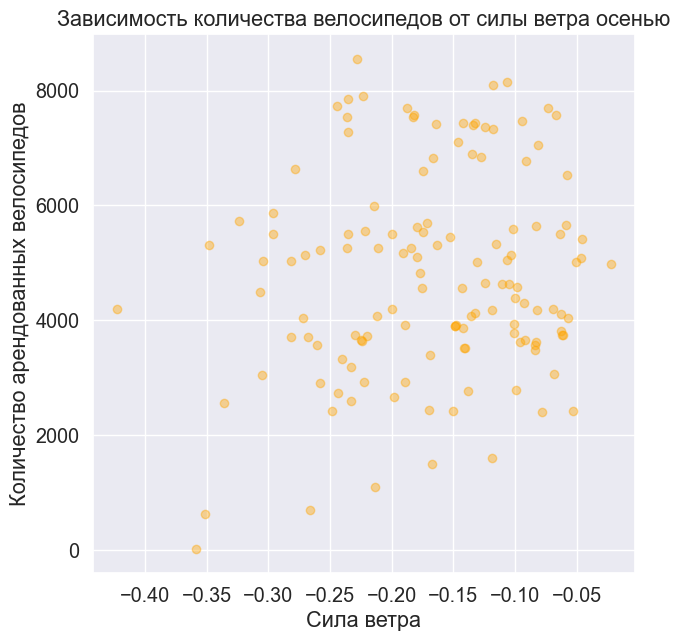

In [14]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(-autumn['windspeed'], autumn['cnt'], color='orange', alpha=0.4)

    plt.title("Зависимость количества велосипедов от силы ветра осенью")
    plt.xlabel("Сила ветра")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Посмотрим всё же на температуру зимой:

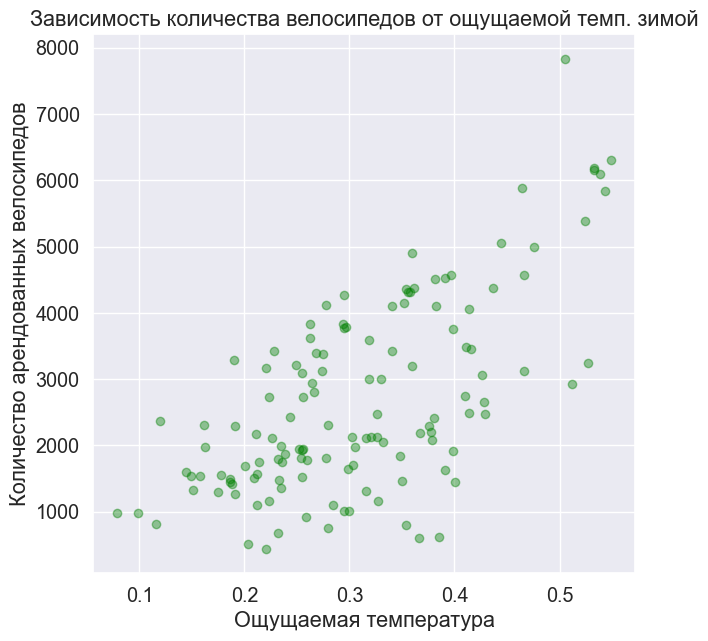

In [15]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(winter['atemp'], winter['cnt'], color='g', alpha=0.4)

    plt.title("Зависимость количества велосипедов от ощущаемой темп. зимой")
    plt.xlabel("Ощущаемая температура")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Здесь уже можно заметить проявление какой-нибудь квадратичной зависимости:

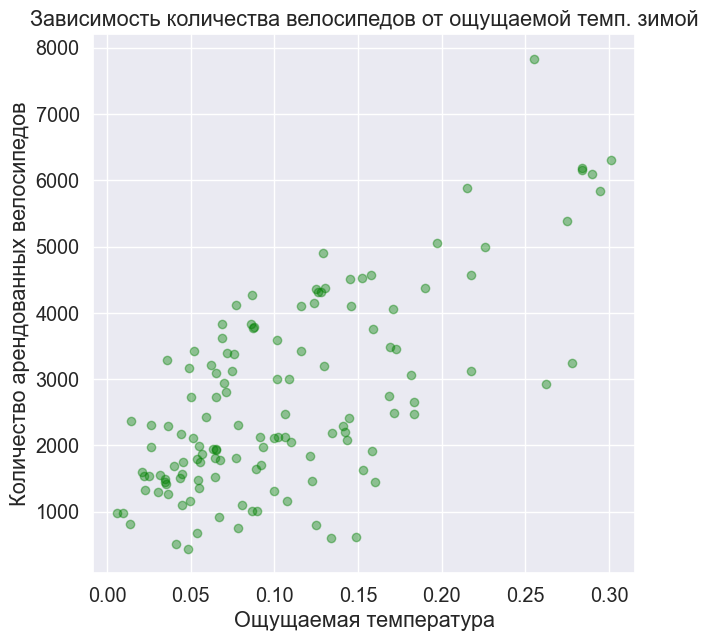

In [16]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(winter['atemp'] ** 2, winter['cnt'], color='g', alpha=0.4)

    plt.title("Зависимость количества велосипедов от ощущаемой темп. зимой")
    plt.xlabel("Ощущаемая температура")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Думаю, так лучше.

И действительная температура:

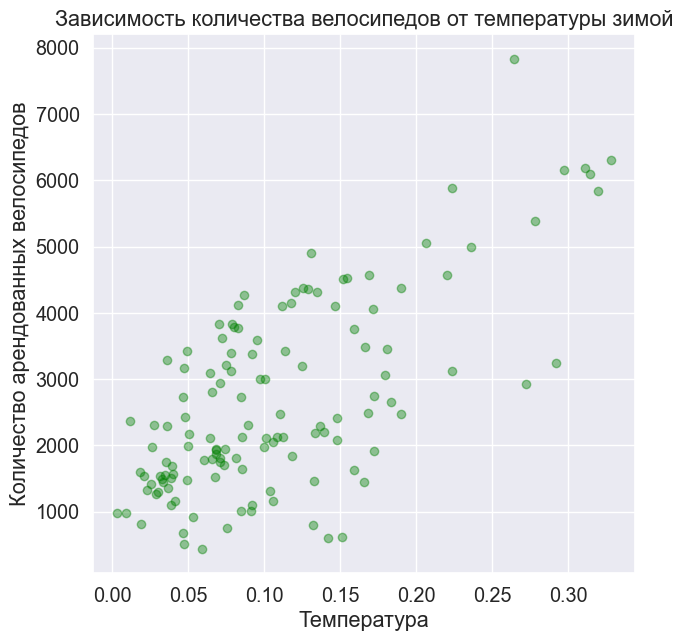

In [17]:
plt.figure(figsize=(7, 7))

with sns.axes_style("darkgrid"):
    plt.scatter(winter['temp'] ** 2, winter['cnt'], color='g', alpha=0.4)

    plt.title("Зависимость количества велосипедов от температуры зимой")
    plt.xlabel("Температура")
    plt.ylabel("Количество арендованных велосипедов")

plt.show()

Значение действительной температуры также успешно описывается квадратичным графиком.

Ну и посмотрим на общую картину происходящего:

In [18]:
categorial_features = ['season', 'holiday', 'workingday', 'weathersit']

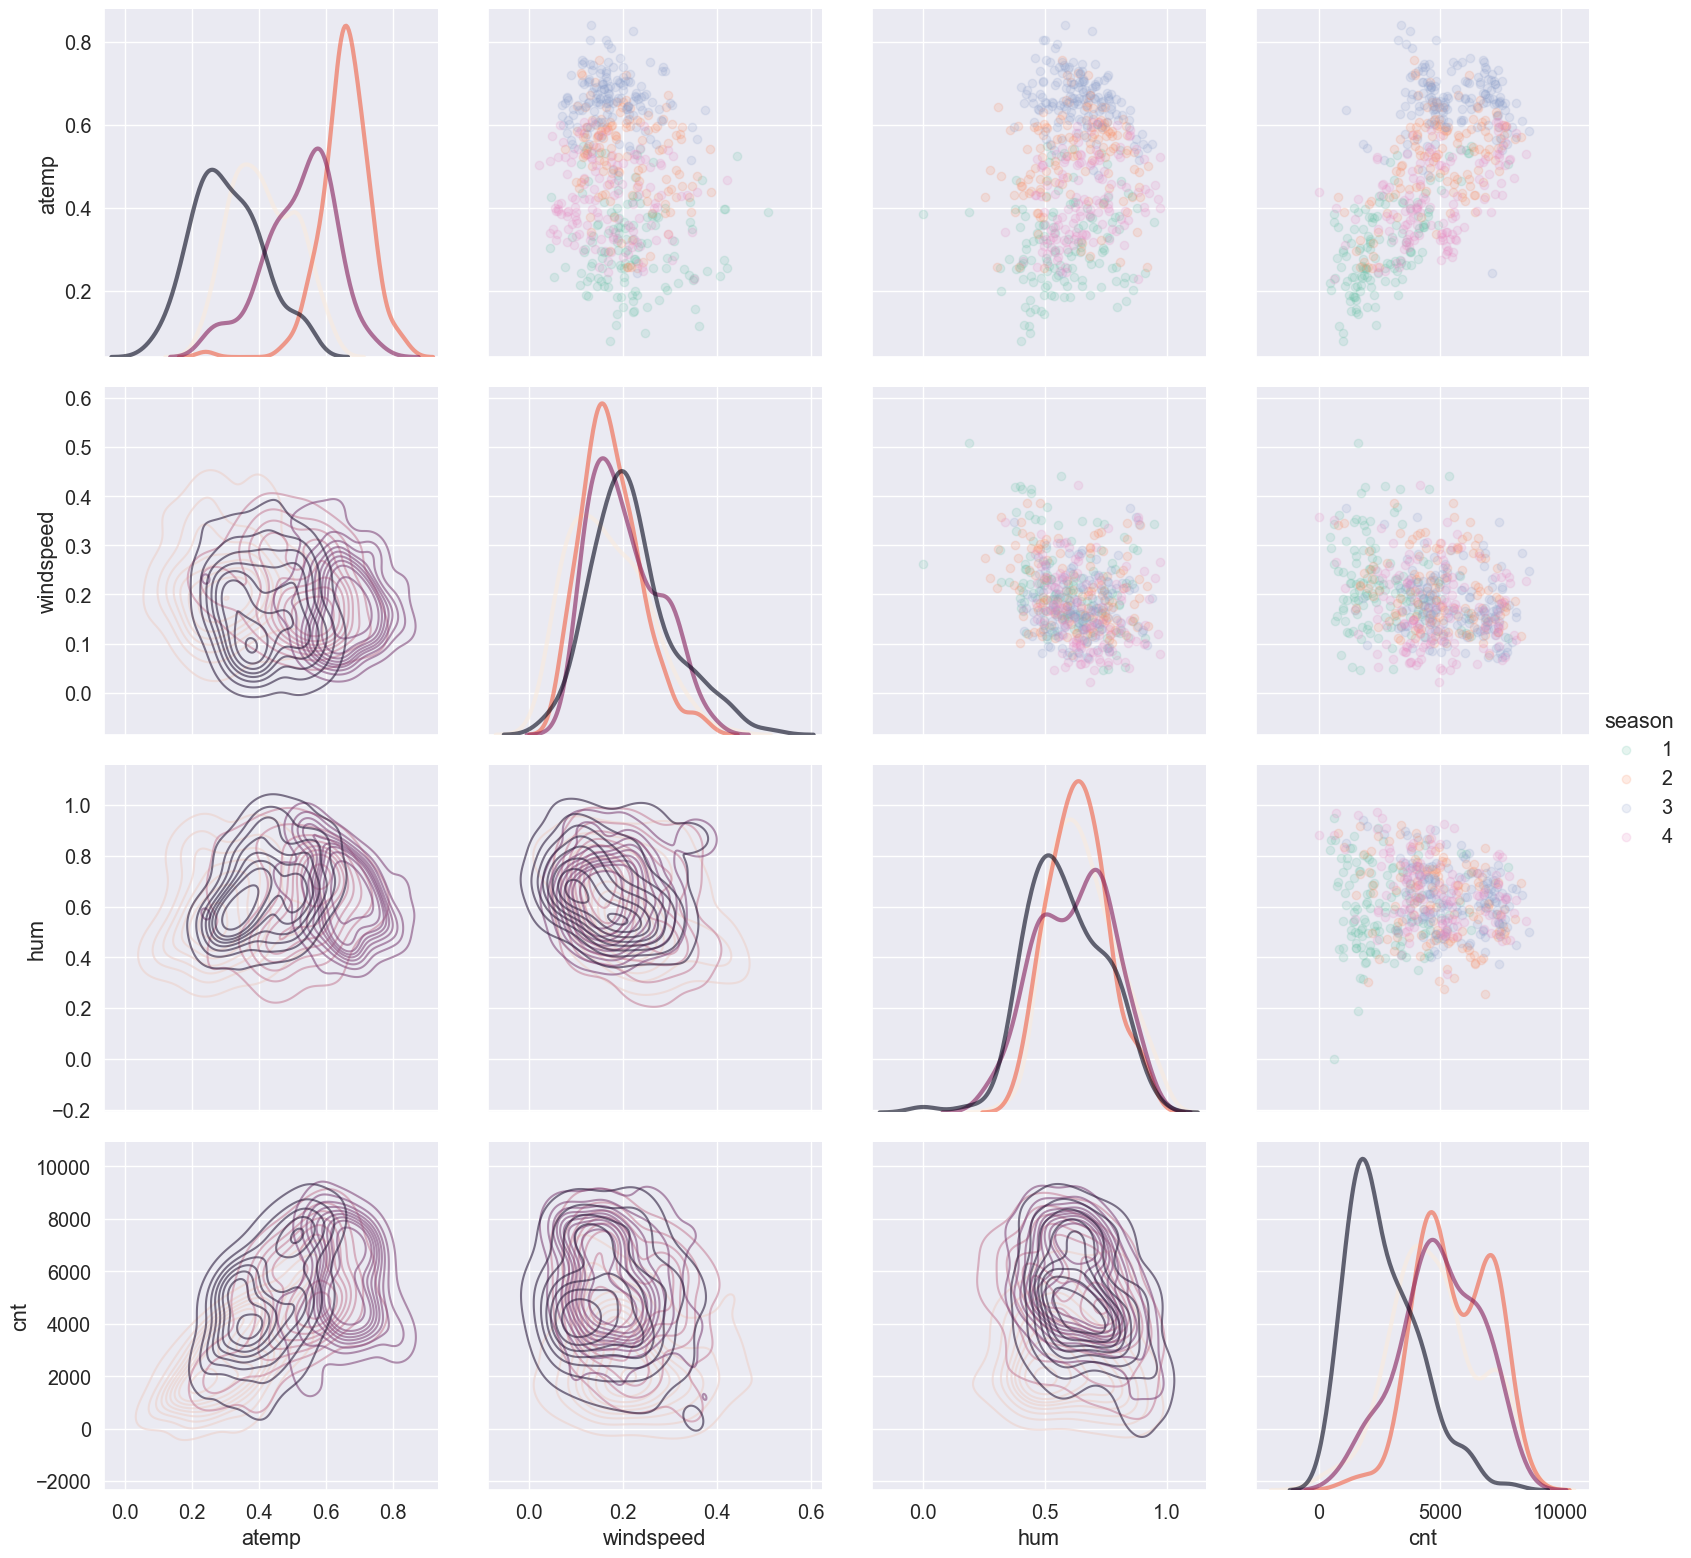

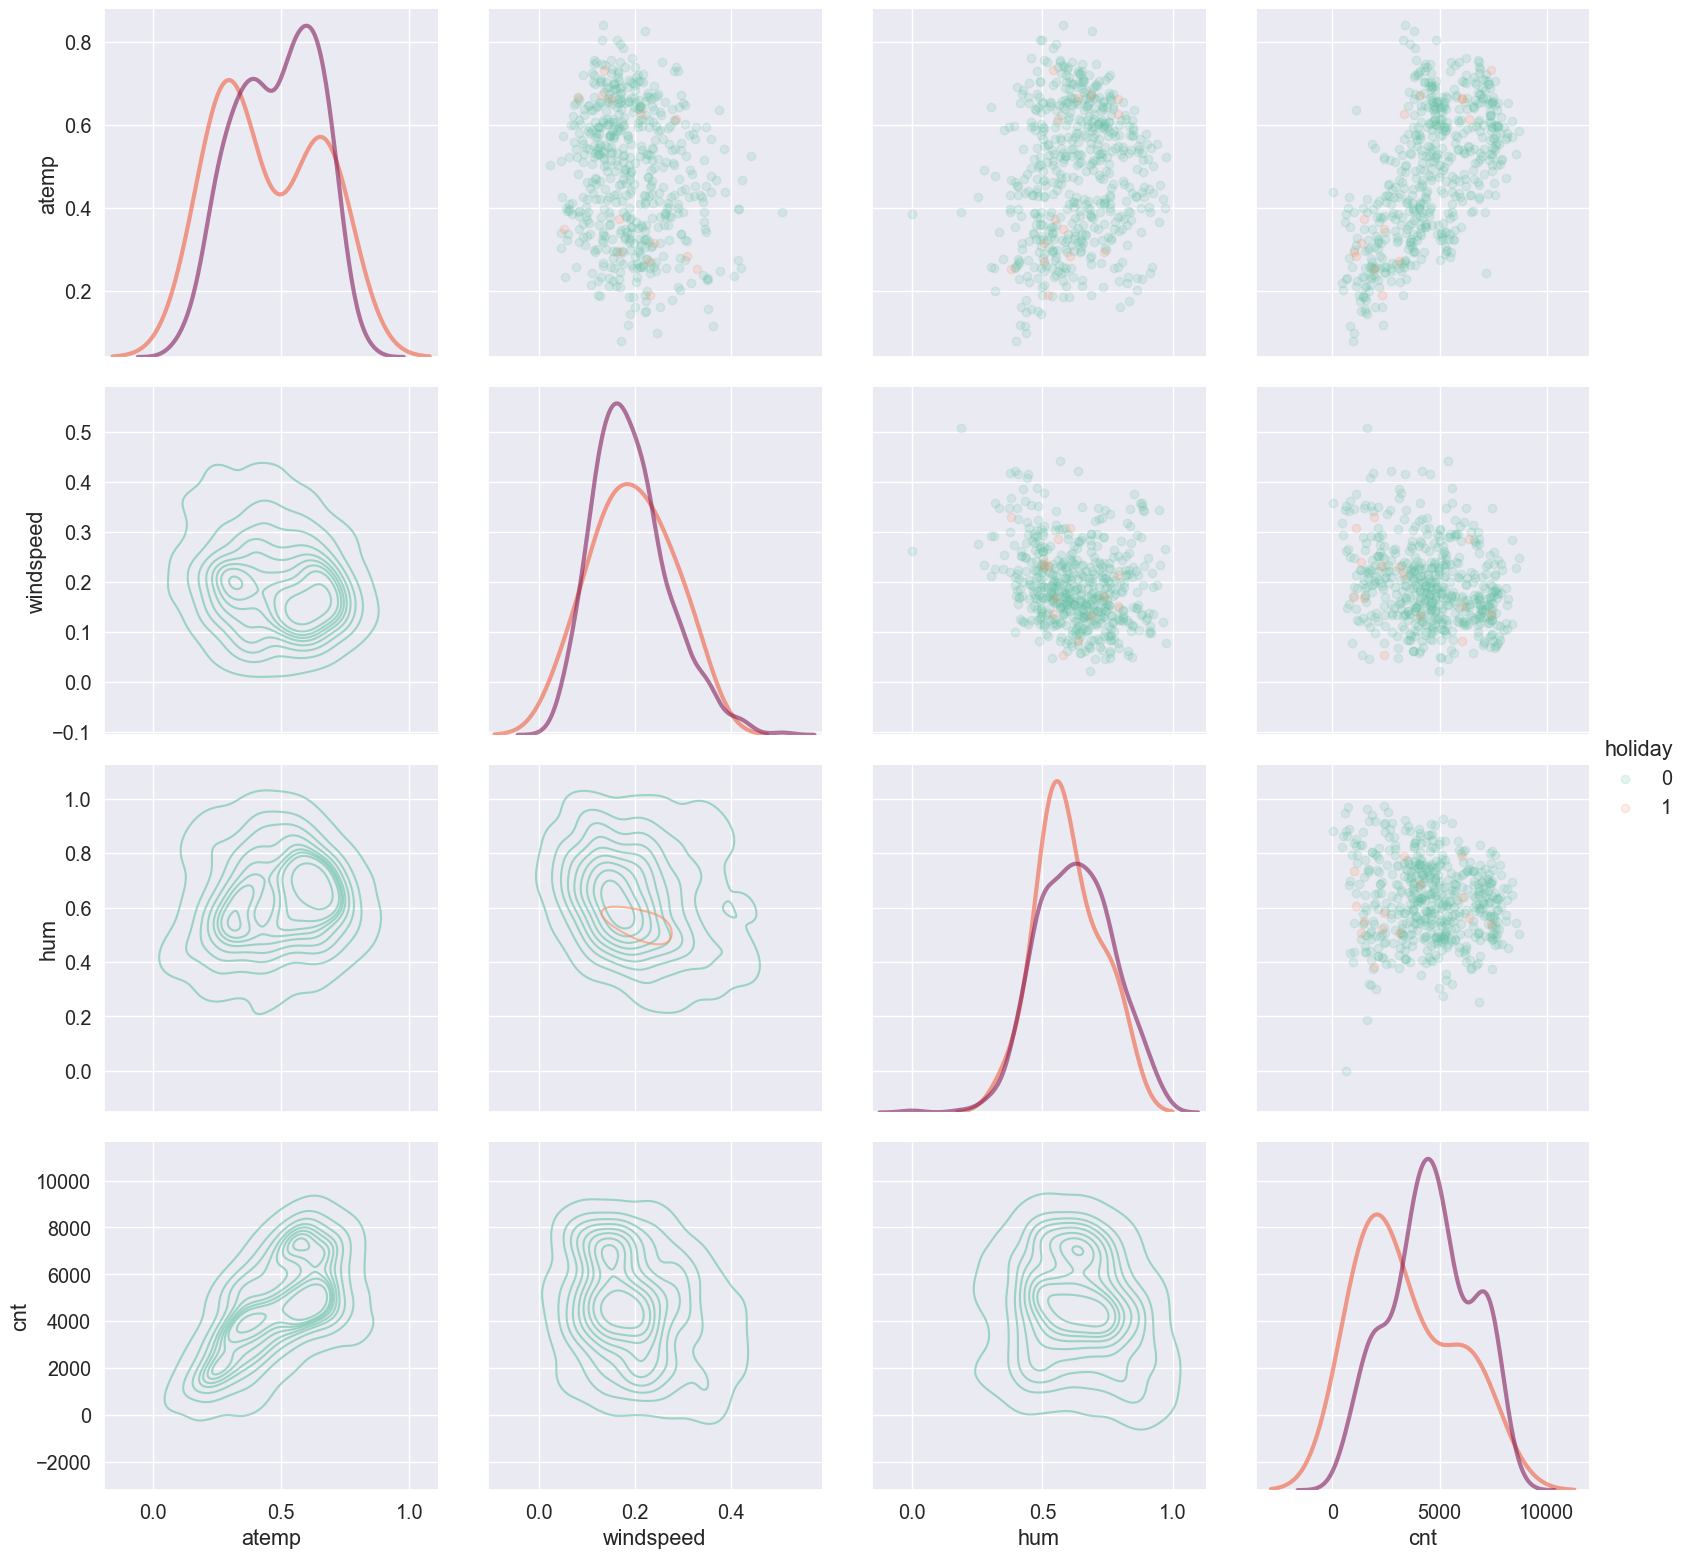

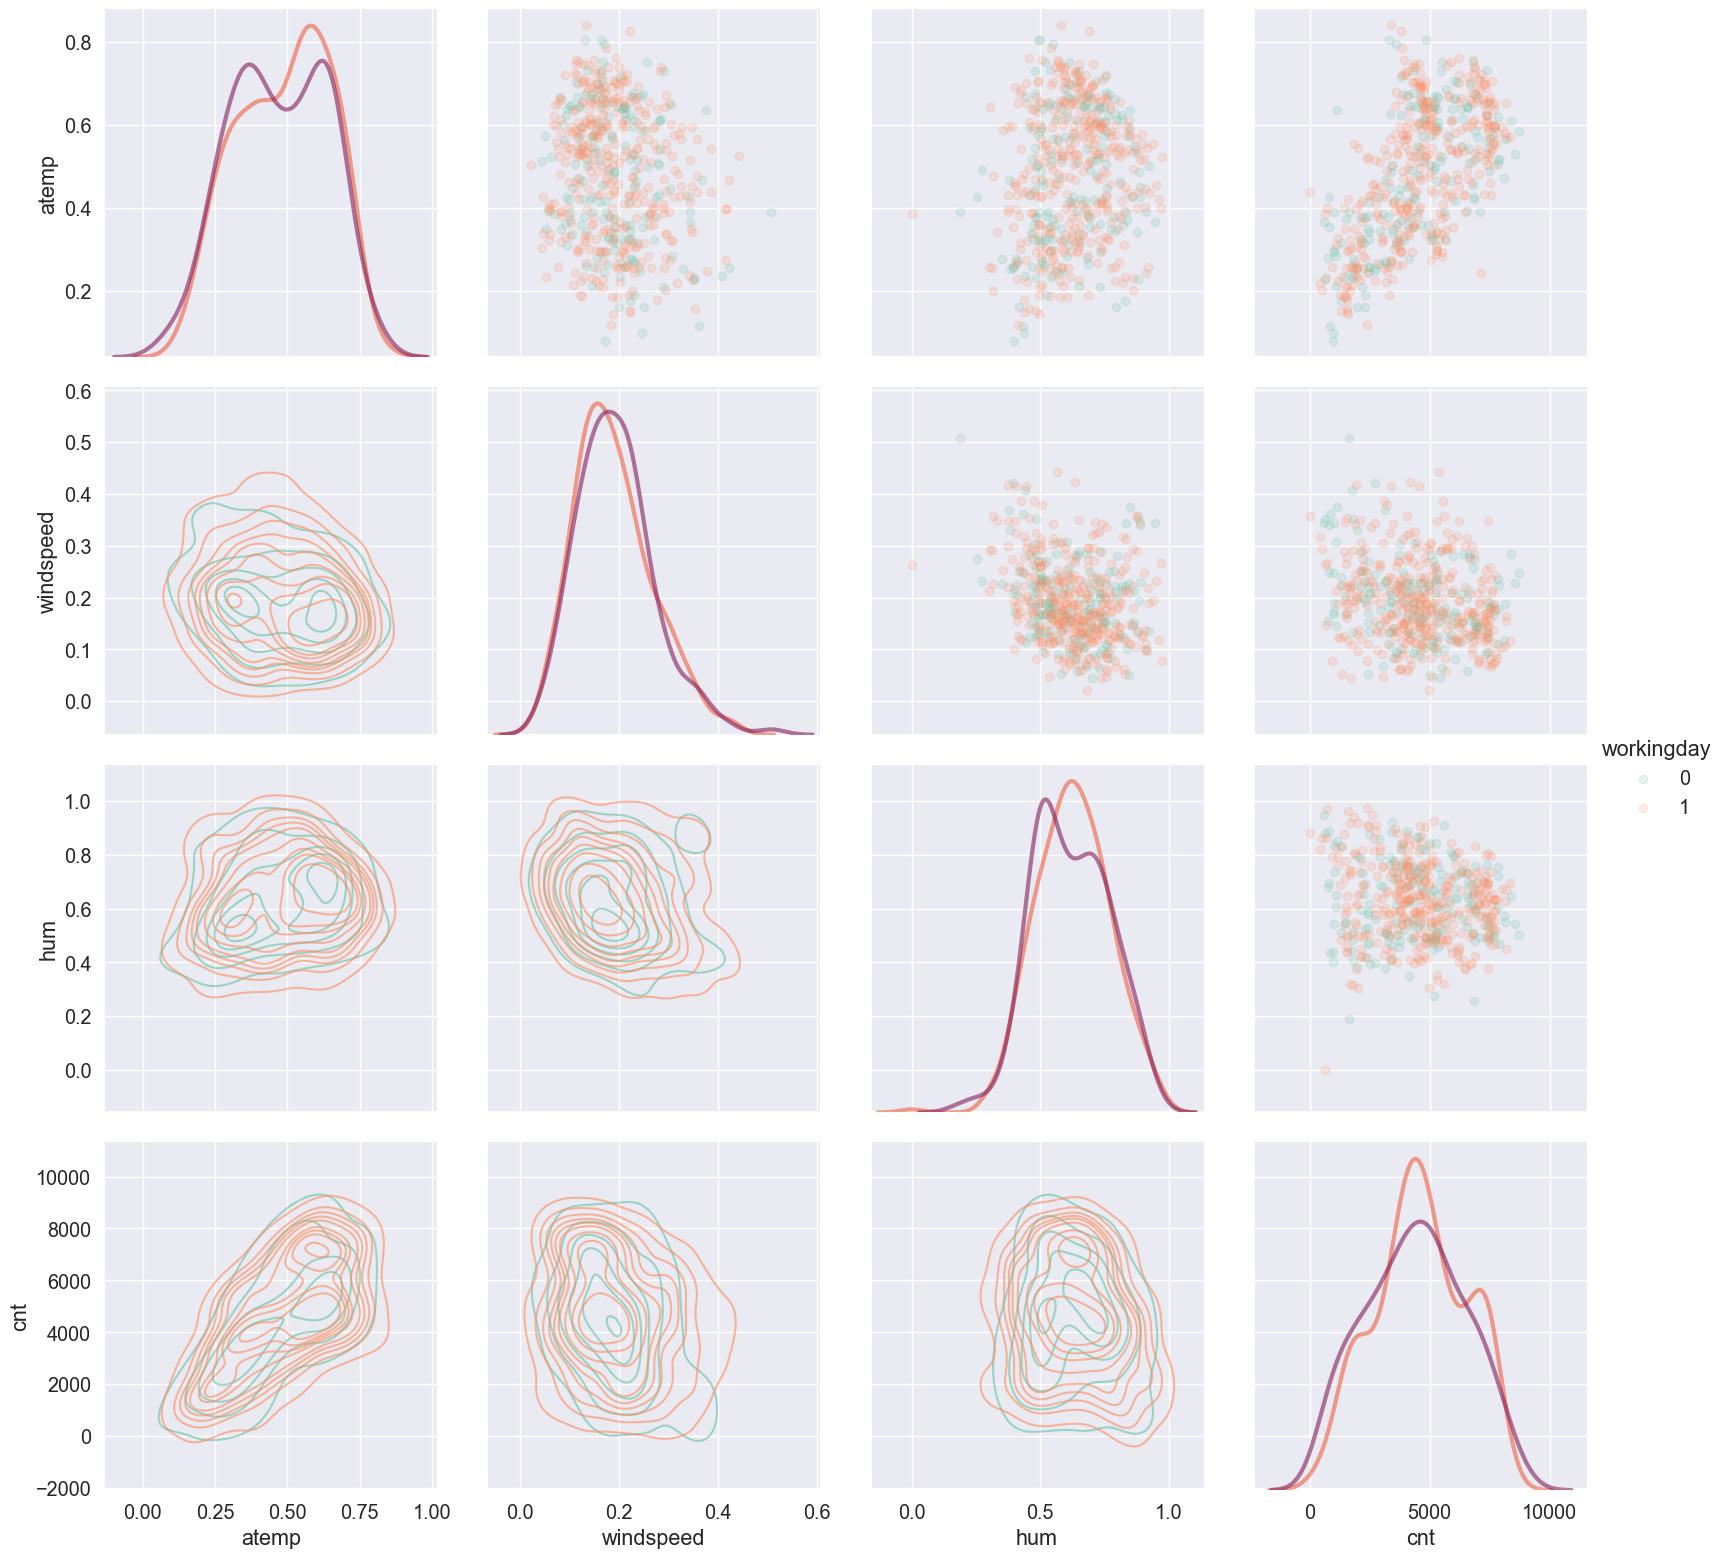

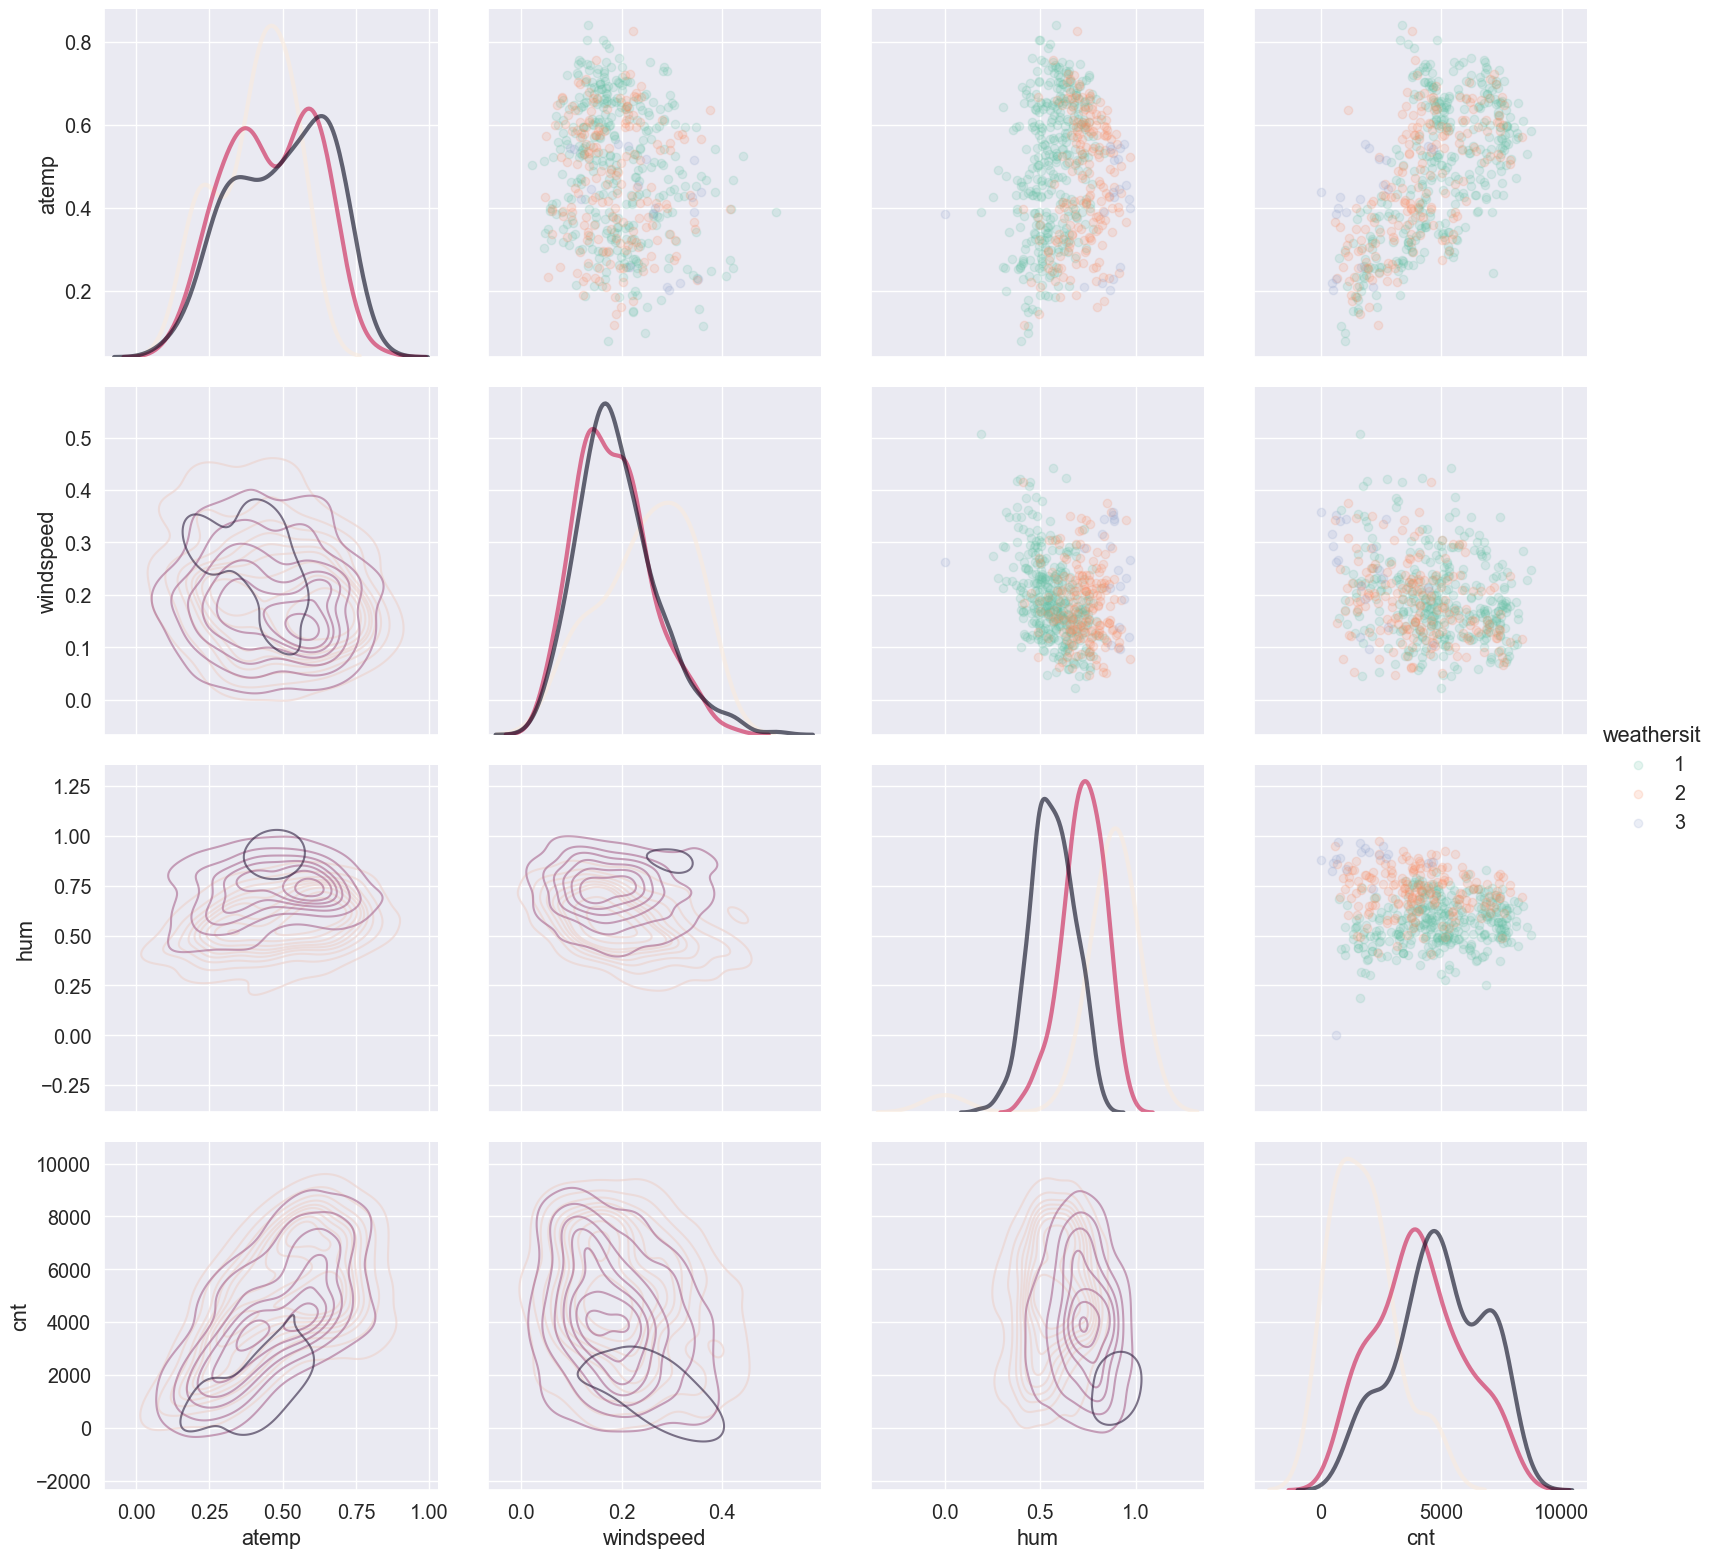

In [19]:
with sns.axes_style("darkgrid"):
    for hue in categorial_features:
        g = sns.PairGrid(train[['atemp', 'windspeed', 'hum', 'cnt', hue]],
                         hue=hue, diag_sharey=False, height=4)

        g.map_lower(sns.kdeplot, alpha=0.6, palette='rocket')
        g.map_upper(plt.scatter, alpha=0.17)
        g.map_diag(sns.kdeplot, lw=3, alpha=0.6, palette='rocket',
                   common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании

        g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
**1)** По первым пяти графикам видно, что выбросы есть: зимой больше 5000 арендованных велосипедов, а весной, летом и осенью больше 8000.

**2)** Также я бы рассмотрел нелинейные функции от признаков: для влажности --- $-x$, для скорости ветра --- $-x$, для температуры --- $x^2$.

**3)** По обобщённому графику можно заметить, что зимой на велосипедах катаются меньше всего, а также что условия благоприятности погоды и температура зависят от числа бронирований: чем лучше погода и теплее на улице, тем больше поездок.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a).** Заполнение пропусков
**б).** Преобразование числовых и нечисловых признаков
**в).** Работа с выбросами
**г).** Устранение линейной зависимости между признаками

Реализуйте данную процедуру.

Пропусков у нас нет:

In [20]:
data.isnull().any().any()

False

In [21]:
cat_features = ['season', 'mnth', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'hum', 'windspeed']
target_feature = 'cnt'

Предлагаю посмотреть на корреляцию между вещественными признаками:

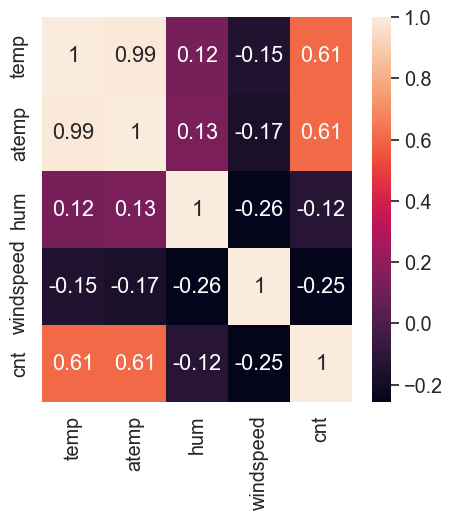

In [22]:
plt.figure(figsize=(5, 5))

sns.heatmap(train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='rocket')

plt.show()

Видно, что "temp" и "atemp" сильно коррелируют между собой, поэтому "atemp" можно спокойно выкинуть. Также я предлагаю поступить и со столбцом "holiday", поскольку, очевидно, этот столбец зависит от столбца "workingday".

In [23]:
train.drop(['holiday'], axis = 1, inplace = True)
train.drop(['atemp'], axis = 1, inplace = True)
test.drop(['holiday'], axis = 1, inplace = True)
test.drop(['atemp'], axis = 1, inplace = True)

In [24]:
train.sample(5)

season  mnth  weekday  workingday  weathersit      temp       hum  \
557       3     7        3           1           1  0.716667  0.633333   
338       4    12        1           1           2  0.385833  0.827083   
224       3     8        6           0           2  0.685833  0.729583   
179       3     6        3           1           1  0.728333  0.497917   
115       2     4        2           1           1  0.631667  0.729167   

     windspeed   cnt  
557   0.151733  7264  
338   0.062208  3811  
224   0.211454  4150  
179   0.261821  5225  
115   0.326500  4400

Предлагаю избавиться от сильно выбивающихся из общей массы значений. Быть может, в эти дни проходили какие-то крупные вело-мероприятия, проходящие раз в год, поэтому в предсказание явно не стоит включать эти события.

In [25]:
cols = train.columns
tr_winter = train[(train['season'] == 1) & (train['cnt'] < 5000)]
tr_spring = train[(train['season'] == 2) & (train['cnt'] < 8000)]
tr_summer = train[(train['season'] == 3) & (train['cnt'] < 8000)]
tr_autumn = train[(train['season'] == 4) & (train['cnt'] < 8000)]

In [26]:
train = pd.DataFrame(np.vstack((tr_winter, tr_spring, tr_summer, tr_autumn)), columns=cols)
train.shape

(529, 9)

Преобразуем числовые признаки на основе полученных выводов из графиков:

In [27]:
train['hum_upd'] = train['hum'].apply(lambda x: -x)
train['windspeed_upd'] = train['windspeed'].apply(lambda x: -x)
train['temp_upd'] = train['temp'].apply(lambda x: x ** 2)

И на тестовых данных:

In [28]:
test['hum_upd'] = test['hum'].apply(lambda x: -x)
test['windspeed_upd'] = test['windspeed'].apply(lambda x: -x)
test['temp_upd'] = test['temp'].apply(lambda x: x ** 2)

Преобразуем категориальные признаки:

In [29]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[cat_features])
encoder.categories_

[array([1., 2., 3., 4.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 array([0., 1.]),
 array([1., 2., 3.])]

In [30]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(529, 26)

Перед обработкой категориальных признаков в тестовых данных, предлагаю посмотреть на выбросы в них:

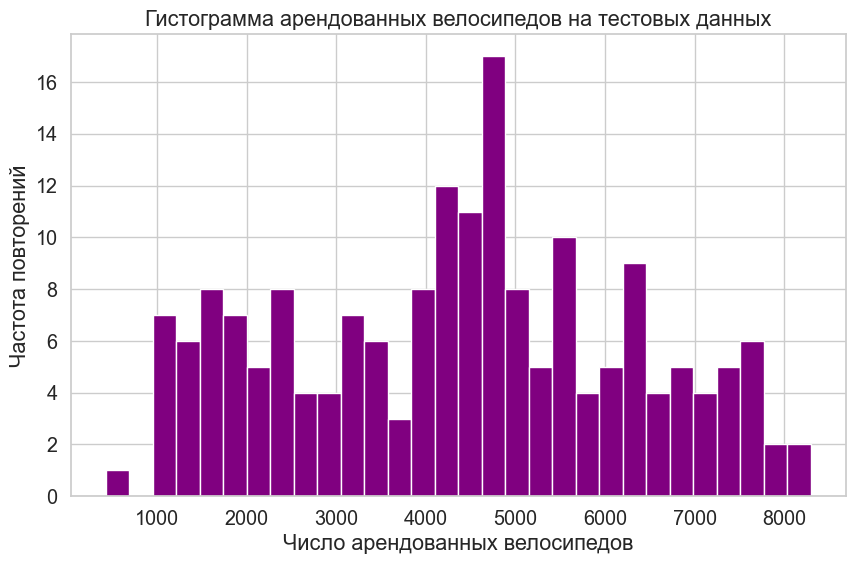

In [31]:
plt.figure(figsize=(10, 6))

plt.hist(test['cnt'], bins=30, color='purple')

plt.title("Гистограмма арендованных велосипедов на тестовых данных")
plt.xlabel("Число арендованных велосипедов")
plt.ylabel("Частота повторений")

plt.show()

In [32]:
test[test['cnt'] >= 7500].shape, test.shape

((10, 12), (183, 12))

Явно видно, что выбросы присутствуют, уберём их:

In [33]:
test = test[test['cnt'] < 7500]
test.shape

(173, 12)

А теперь поработаем с категориальными признаками:

In [34]:
test_cat = encoder.transform(test[cat_features])
X_test = np.hstack([test[real_features], test_cat])
X_test.shape

(173, 26)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [35]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature]);  # обучаем

Выведем оценку коэффициентов:

In [36]:
model.coef_

array([ 5316.57594322, -3081.76110949, -3574.2985824 ,  1101.17074399,
         877.77497546,  1810.70105835,   -49.93786901,  -352.58937797,
         -74.56868306,   148.36678836,  -232.77658857,  -518.11381795,
        -185.86089796,   428.47072178,    36.01962048,  -597.2272352 ,
        -413.63705726,  -568.47943702,  -443.21897511,  -433.63324972,
        -435.82217271,  -390.87065626,   293.41877593,   731.74743986,
        -217.0268329 , -1797.70186112])

А также оценку свободного коэффициента:

In [37]:
model.intercept_

3526.979491487181

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики.

(Выбросы на тестовых данных убраны ранее)

Сделаем предсказания:

In [38]:
test_preds = model.predict(X_test)

Ошибка RMSE:

In [39]:
np.sqrt(((test[target_feature] - test_preds) ** 2).mean())

1169.638986770491

Ошибка MAE:

In [40]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1015.4154723684745

Напишем функцию подсчёта ошибки MAPE:

In [41]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

 И посчитаем её:

In [42]:
mean_absolute_percentage_error(test[target_feature], test_preds)

32.39982387036098

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Поскольку зависимости между признаками были убраны ранее, то результат должен быть вполне хорошим.

Посчитаем оценку коэффициентов с помощью формулы, полученной на лекции (добавив сначала столбец константных признаков):

In [43]:
ones_train = np.ones(shape=(X_train.shape[0], 1))
ones_test = np.ones(shape=(X_test.shape[0], 1))
X_train_self = np.hstack([ones_train, X_train])
X_test_self = np.hstack([ones_test, X_test])

X_train_self.shape, X_test_self.shape

((529, 27), (173, 27))

In [44]:
theta = (np.linalg.inv(X_train_self.T @ X_train_self) @ X_train_self.T) @ train[target_feature]
theta

array([ 3526.97949149,  5316.57594322, -3081.76110949, -3574.2985824 ,
        1101.17074399,   877.77497546,  1810.70105835,   -49.93786901,
        -352.58937797,   -74.56868306,   148.36678836,  -232.77658857,
        -518.11381795,  -185.86089796,   428.47072178,    36.01962048,
        -597.2272352 ,  -413.63705726,  -568.47943702,  -443.21897511,
        -433.63324972,  -435.82217271,  -390.87065626,   293.41877593,
         731.74743986,  -217.0268329 , -1797.70186112])

Посчитаем предсказания:

In [45]:
predictions = X_test_self @ theta
predictions.mean()

4221.433127083473

Ошибка RMSE:

In [46]:
np.sqrt(((test[target_feature] - predictions) ** 2).mean())

1169.6389867704902

Ошибка MAE:

In [47]:
metrics.mean_absolute_error(test[target_feature], predictions)

1015.4154723684609

Посчитаем ошибку MAPE:

In [48]:
mean_absolute_percentage_error(test[target_feature], predictions)

32.399823870360166

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

(Исправлено ранее)

Сделайте выводы.

**Выводы:**
Итак, я впервые поработал с машинным обучением. Обработал данные и обучил модель линейной регрессии для предсказывания ежедневного числа арендованных велосипедов. На самом деле, результат не так уж и плох: ошибка MAPE около 30% в случае обучения по модели из библиотеки и по формуле из лекции, а MAE составляет 1000 при среднем значении 4400 целевой переменной.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

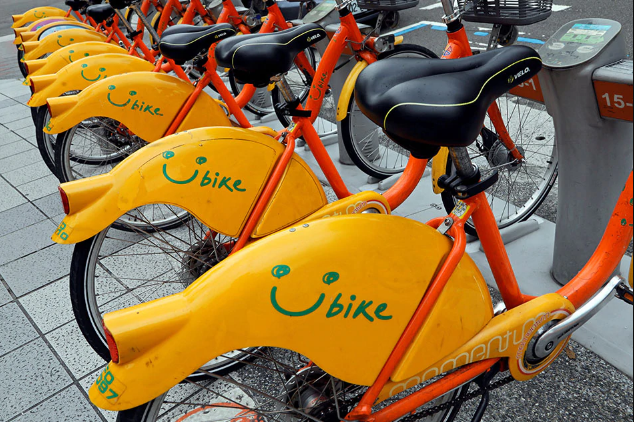

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [49]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.

        if self.fit_intercept:
            X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))

        self.theta = np.linalg.inv(X.T @ X + self.lambd * np.identity(X.shape[1])) @ X.T @ Y

        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания

        if self.fit_intercept:
            X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))

        return X @ self.theta

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [50]:
data = pd.read_csv("day.csv")
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
             'atemp', 'hum', 'windspeed', 'cnt']]
data.sample(5)

season  mnth  holiday  weekday  workingday  weathersit      temp  \
602       3     8        0        6           0           2  0.661667   
595       3     8        0        6           0           1  0.678333   
345       4    12        0        1           1           1  0.238333   
220       3     8        0        2           1           1  0.775000   
499       2     5        0        1           1           2  0.573333   

        atemp       hum  windspeed   cnt  
602  0.618696  0.712917   0.244408  6053  
595  0.618071  0.603333   0.177867  7865  
345  0.270196  0.670833   0.063450  3310  
220  0.724121  0.570417   0.151121  4602  
499  0.549900  0.789583   0.212692  2843

Сделаем ту же предобработку данных, как и в задании 2:

In [51]:
data["temp_upd"] = data["temp"].apply(lambda x: x ** 2)
data["hum_upd"] = data["hum"].apply(lambda x: -x)
data["windspeed_upd"] = data["windspeed"].apply(lambda x: -x)

Поделим данные:

In [52]:
train, test_tmp = train_test_split(data, test_size=0.4, shuffle=True)
valid, test = train_test_split(test_tmp, test_size=0.5, shuffle=True)
train.shape, valid.shape, test.shape

((438, 14), (146, 14), (147, 14))

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

Обработаем категориальные признаки:

In [53]:
cat_features = ['season', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

In [54]:
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[cat_features])
X_train = np.hstack((train[real_features], train_cat))
X_train.shape

(438, 28)

In [55]:
valid_cat = encoder.transform(valid[cat_features])
X_valid = np.hstack((valid[real_features], valid_cat))
X_valid.shape

(146, 28)

In [56]:
test_cat = encoder.transform(test[cat_features])
X_test = np.hstack((test[real_features], test_cat))
X_test.shape

(147, 28)

Применим StandartScaler ко всем наборам:

In [57]:
mean_list = []
var_list = []

X_train_scaled = np.ndarray(shape=X_train.shape)
X_valid_scaled = np.ndarray(shape=X_valid.shape)
X_test_scaled = np.ndarray(shape=X_test.shape)

for i in range(X_train.shape[1]):
    mean_list.append(np.mean(X_train[:, i]))
    var_list.append(np.var(X_train[:, i]))

    X_train_scaled[:, i] = (X_train[:, i] - mean_list[i]) / np.sqrt(var_list[i])
    X_valid_scaled[:, i] = (X_valid[:, i] - mean_list[i]) / np.sqrt(var_list[i])
    X_test_scaled[:, i] = (X_test[:, i] - mean_list[i]) / np.sqrt(var_list[i])

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [58]:
grid = np.logspace(0.5, 4, num=15)

model_list = []

for lambd in grid:
    model = RidgeRegression(lambd=lambd, fit_intercept=True)
    model_list.append(model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [59]:
rmse_train = []
mae_train = []
mape_train = []

rmse_valid = []
mae_valid = []
mape_valid = []

for model in model_list:
    model.fit(X_train_scaled, train[target_feature])

    preds_train = model.predict(X_train_scaled)
    preds_valid = model.predict(X_valid_scaled)

    rmse_train.append(np.sqrt(((train[target_feature] - preds_train) ** 2).mean()))
    mae_train.append(metrics.mean_absolute_error(train[target_feature], preds_train))
    mape_train.append(mean_absolute_percentage_error(train[target_feature], preds_train))

    rmse_valid.append(np.sqrt(((valid[target_feature] - preds_valid) ** 2).mean()))
    mae_valid.append(metrics.mean_absolute_error(valid[target_feature], preds_valid))
    mape_valid.append(mean_absolute_percentage_error(valid[target_feature], preds_valid))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

Начнём с RMSE:

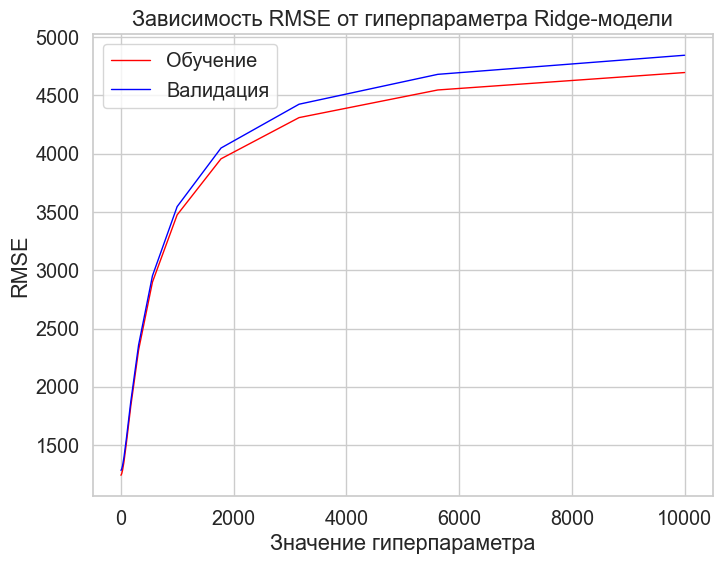

In [60]:
plt.figure(figsize=(8, 6))

plt.plot(grid, rmse_train, color='red', lw=1, label="Обучение")
plt.plot(grid, rmse_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость RMSE от гиперпараметра Ridge-модели")
plt.xlabel("Значение гиперпараметра")
plt.ylabel("RMSE")
plt.legend()

plt.show()

Теперь MAE:

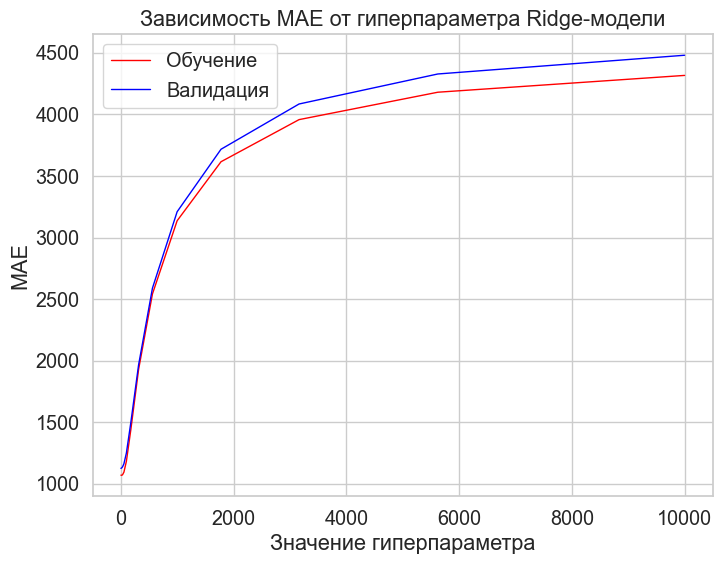

In [61]:
plt.figure(figsize=(8, 6))

plt.plot(grid, mae_train, color='red', lw=1, label="Обучение")
plt.plot(grid, mae_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость MAE от гиперпараметра Ridge-модели")
plt.xlabel("Значение гиперпараметра")
plt.ylabel("MAE")
plt.legend()

plt.show()

И, наконец, MAPE:

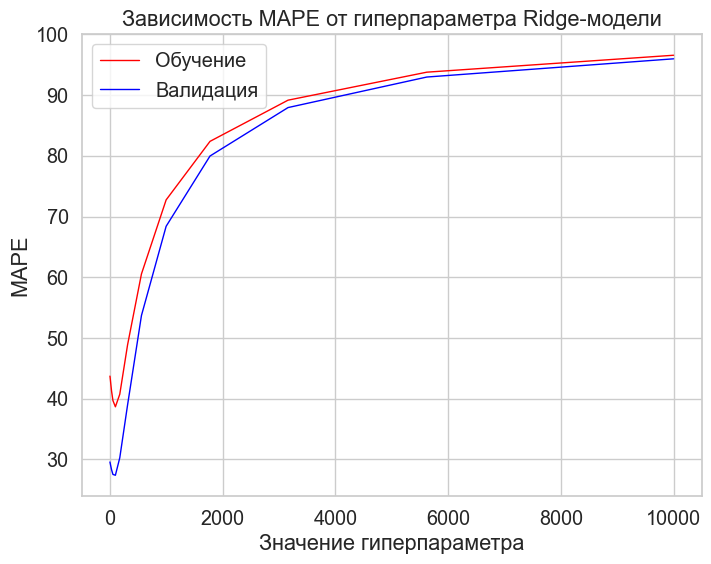

In [62]:
plt.figure(figsize=(8, 6))

plt.plot(grid, mape_train, color='red', lw=1, label="Обучение")
plt.plot(grid, mape_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость MAPE от гиперпараметра Ridge-модели")
plt.xlabel("Значение гиперпараметра")
plt.ylabel("MAPE")
plt.legend()

plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

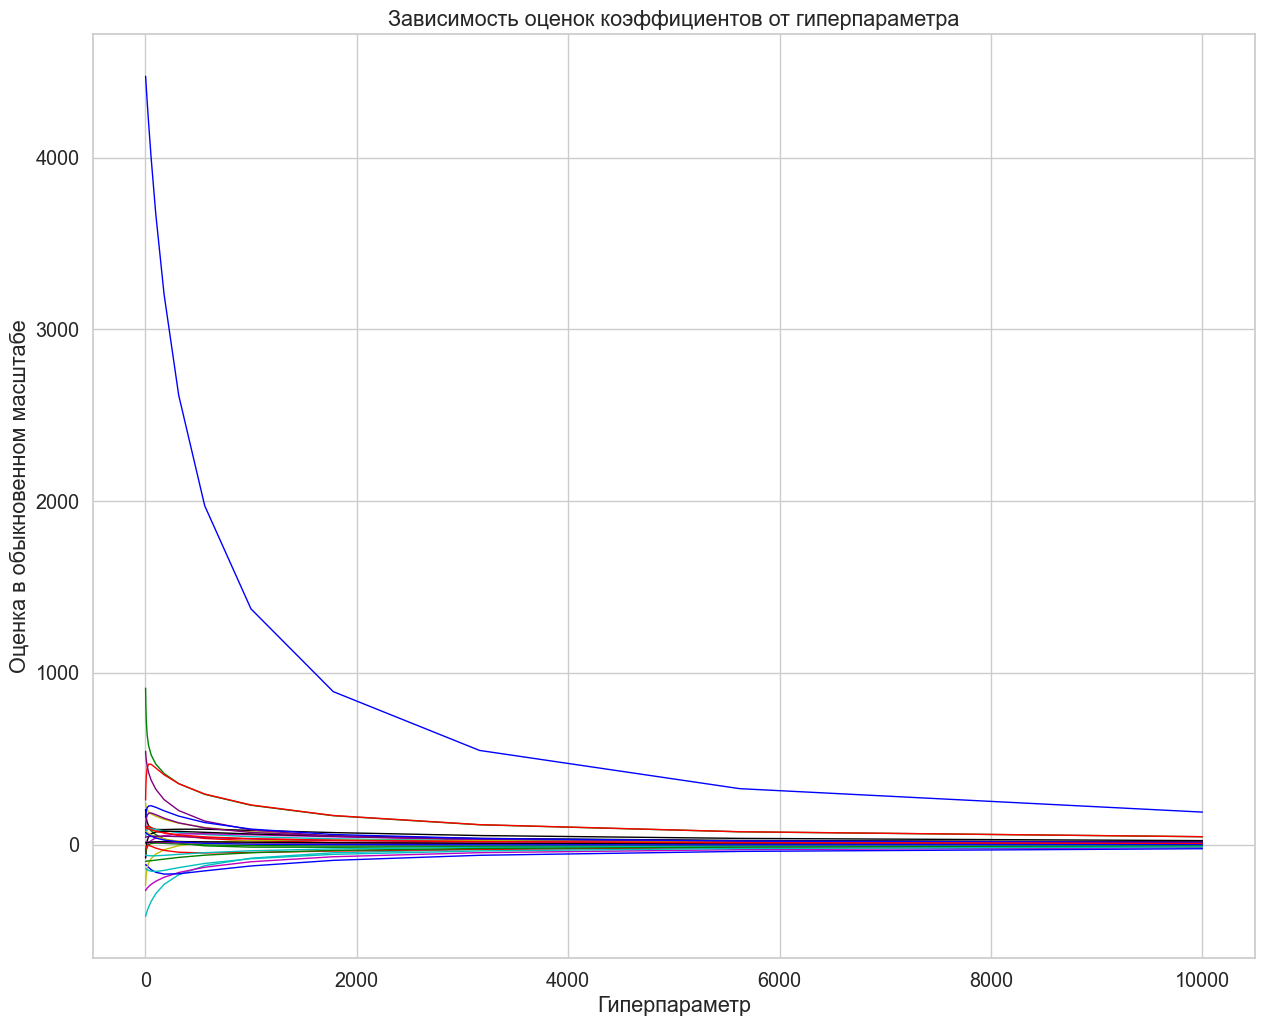

In [63]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
plt.figure(figsize=(15, 12))

estim = []

for i in range(28):
    for model in model_list:
        estim.append(model.theta[i])
    plt.plot(grid, estim, color=colors[i % 8], lw=1)
    estim = []

plt.title("Зависимость оценок коэффициентов от гиперпараметра")
plt.xlabel("Гиперпараметр")
plt.ylabel("Оценка в обыкновенном масштабе")

plt.show()

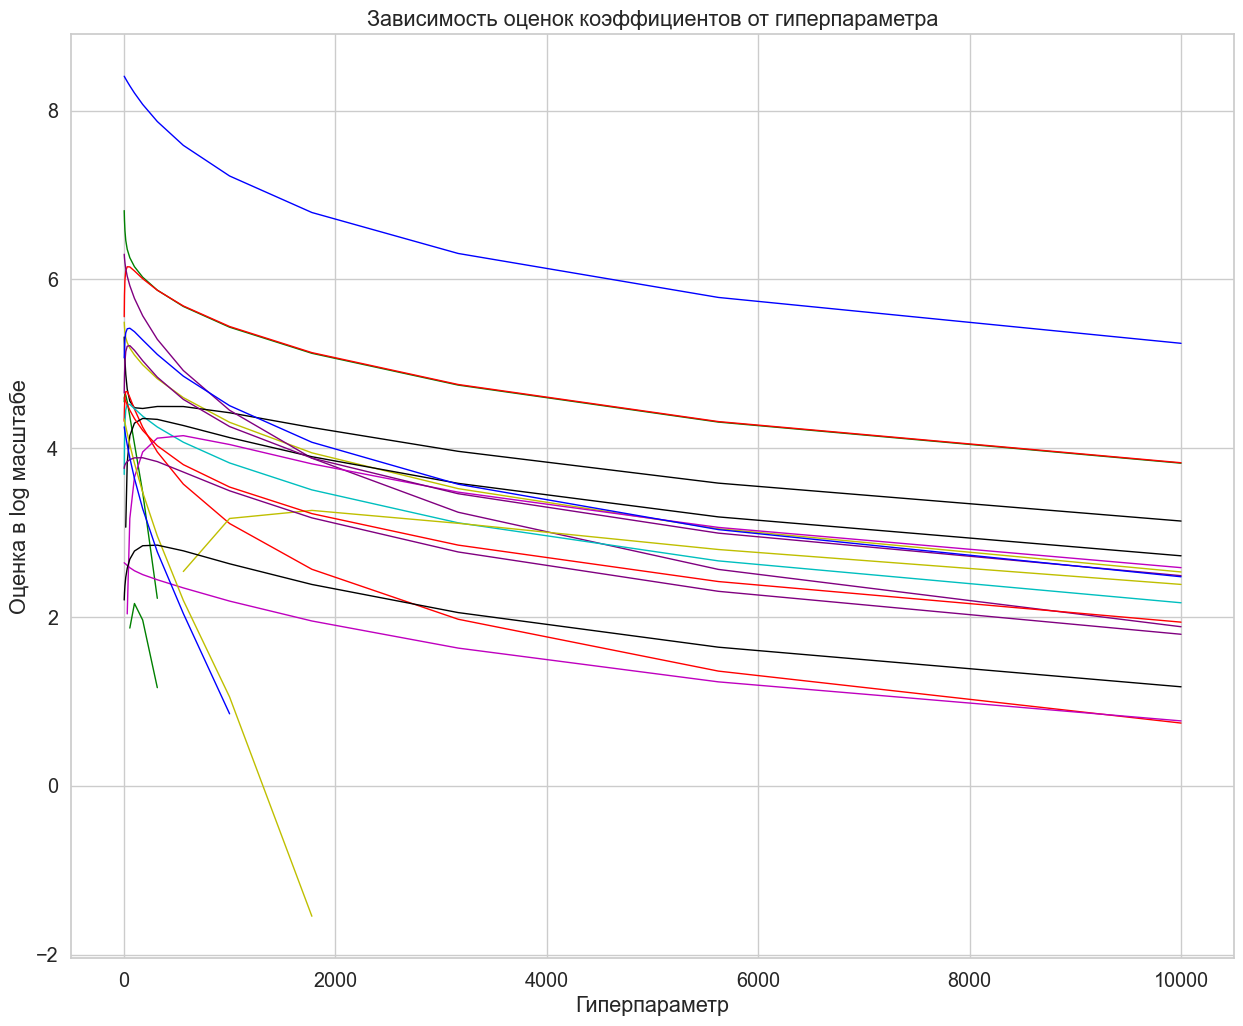

In [64]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
plt.figure(figsize=(15, 12))

estim = []

for i in range(28):
    for model in model_list:
        estim.append(model.theta[i])
    plt.plot(grid, np.log(estim), color=colors[i % 8], lw=1)
    estim = []

plt.title("Зависимость оценок коэффициентов от гиперпараметра")
plt.xlabel("Гиперпараметр")
plt.ylabel("Оценка в log масштабе")

plt.show()

Посмотрим на графики поближе:

In [65]:
grid = np.logspace(0.5, 2.7, num=15)

model_list = []

for lambd in grid:
    model = RidgeRegression(lambd=lambd, fit_intercept=True)
    model_list.append(model)

In [66]:
rmse_train = []
mae_train = []
mape_train = []

rmse_valid = []
mae_valid = []
mape_valid = []

for model in model_list:
    model.fit(X_train_scaled, train[target_feature])

    preds_train = model.predict(X_train_scaled)
    preds_valid = model.predict(X_valid_scaled)

    rmse_train.append(np.sqrt(((train[target_feature] - preds_train) ** 2).mean()))
    mae_train.append(metrics.mean_absolute_error(train[target_feature], preds_train))
    mape_train.append(mean_absolute_percentage_error(train[target_feature], preds_train))

    rmse_valid.append(np.sqrt(((valid[target_feature] - preds_valid) ** 2).mean()))
    mae_valid.append(metrics.mean_absolute_error(valid[target_feature], preds_valid))
    mape_valid.append(mean_absolute_percentage_error(valid[target_feature], preds_valid))

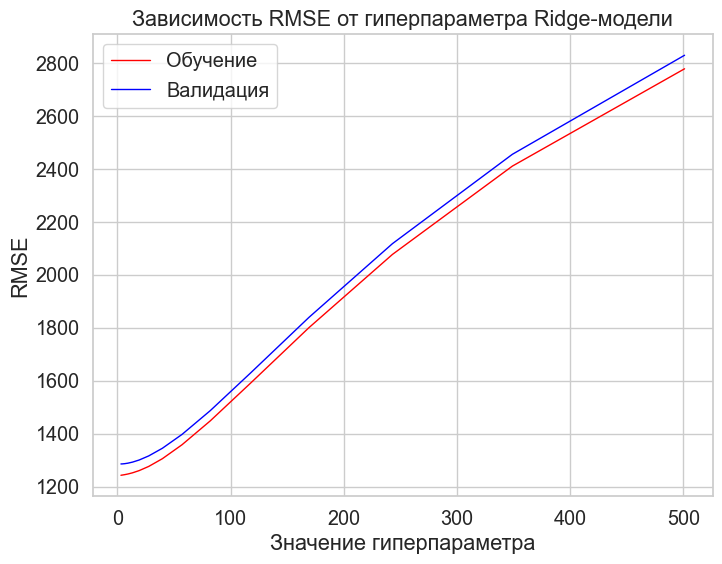

In [67]:
plt.figure(figsize=(8, 6))

plt.plot(grid, rmse_train, color='red', lw=1, label="Обучение")
plt.plot(grid, rmse_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость RMSE от гиперпараметра Ridge-модели")
plt.xlabel("Значение гиперпараметра")
plt.ylabel("RMSE")
plt.legend()

plt.show()

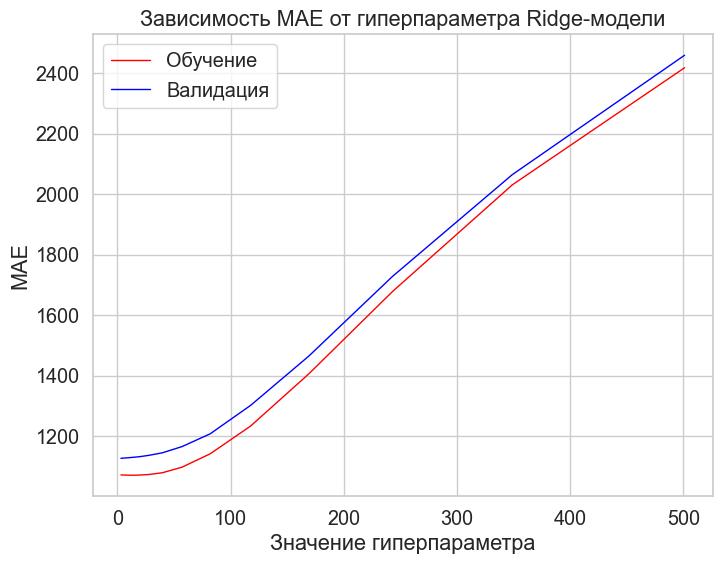

In [68]:
plt.figure(figsize=(8, 6))

plt.plot(grid, mae_train, color='red', lw=1, label="Обучение")
plt.plot(grid, mae_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость MAE от гиперпараметра Ridge-модели")
plt.xlabel("Значение гиперпараметра")
plt.ylabel("MAE")
plt.legend()

plt.show()

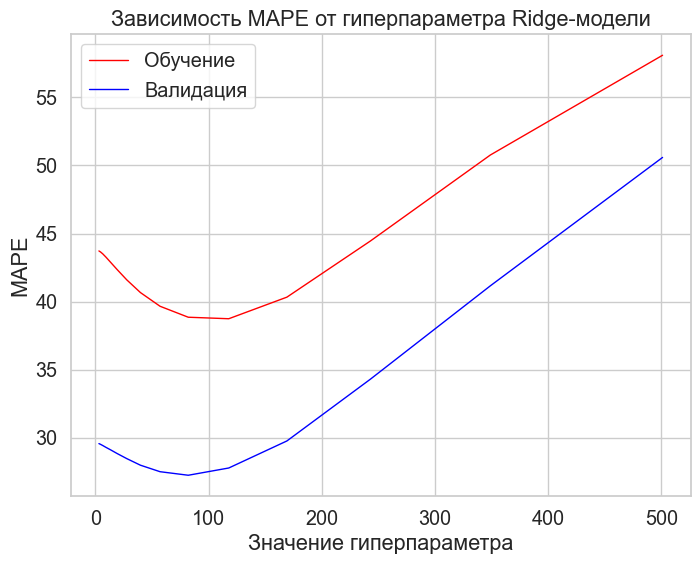

In [69]:
plt.figure(figsize=(8, 6))

plt.plot(grid, mape_train, color='red', lw=1, label="Обучение")
plt.plot(grid, mape_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость MAPE от гиперпараметра Ridge-модели")
plt.xlabel("Значение гиперпараметра")
plt.ylabel("MAPE")
plt.legend()

plt.show()

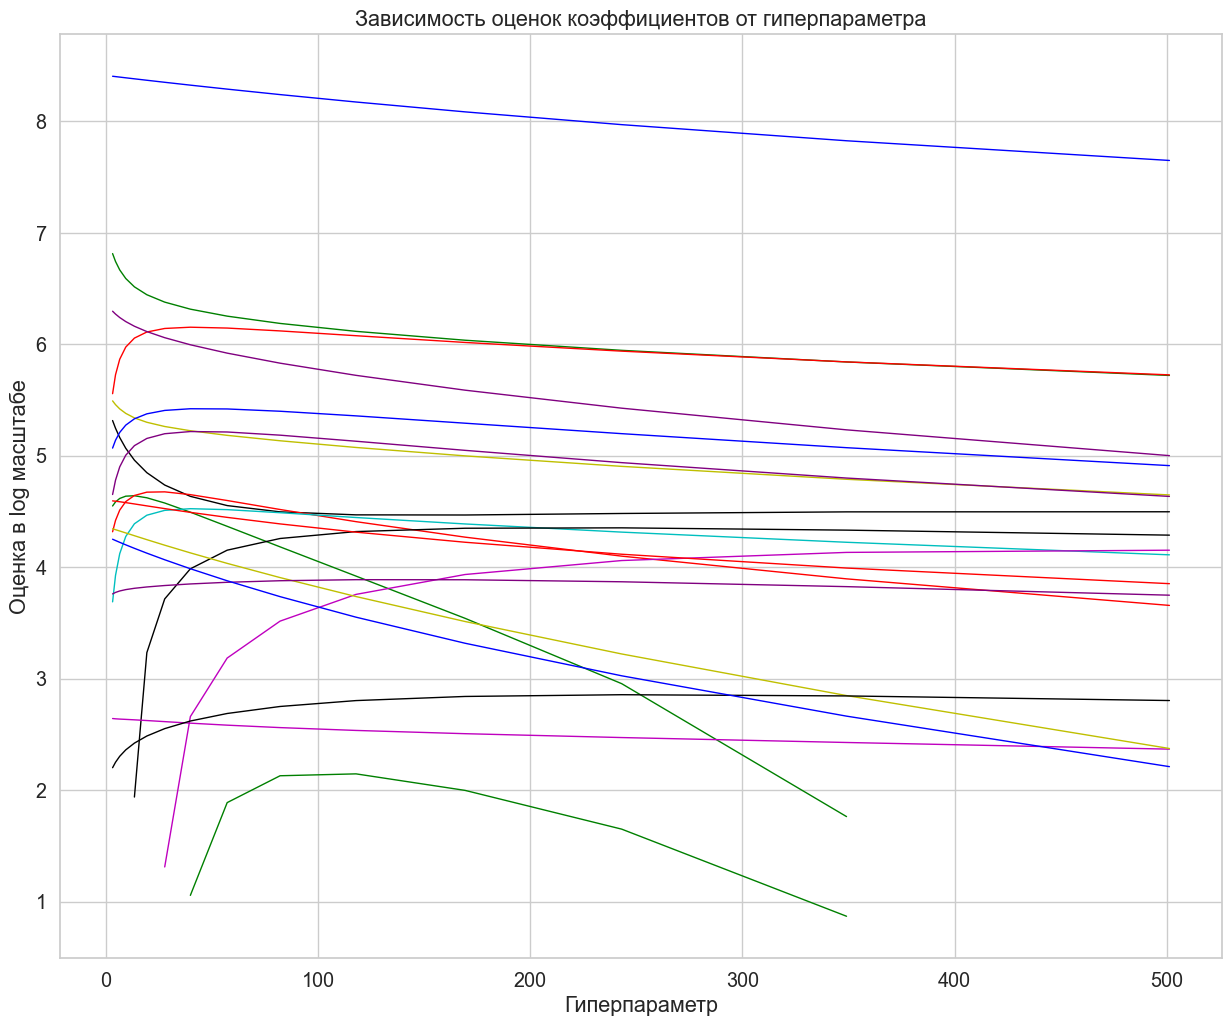

In [70]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
plt.figure(figsize=(15, 12))

estim = []

for i in range(28):
    for model in model_list:
        estim.append(model.theta[i])
    plt.plot(grid, np.log(estim), color=colors[i % 8], lw=1)
    estim = []

plt.title("Зависимость оценок коэффициентов от гиперпараметра")
plt.xlabel("Гиперпараметр")
plt.ylabel("Оценка в log масштабе")

plt.show()

Рассматривая зависимости ошибок от гиперпараметра, можно заметить, что в самом начале зависимость похожа на квадратичную, и есть минимум, а затем зависимость выходит на логарифмическую, и ошибка постоянно возрастает (будь то RMSE, MAE или MAPE). Также значение ошибки MAPE на обучающем наборе выше, чем на валидационном Зависимости оценок признаков от гиперпараметра в начале имеют быстрый рост вверх (или вниз), а затем как будто логарифмически затухают (или возрастают). Смотря на обычный масштаб, видно, что в итоге графики подходят всё ближе к значению нуль: слишком большое значение гиперпараметра ведёт к большому значению детерминанта матрицы, от которой мы берём обратную; следовательно, значение оценок стремится к нулю, поскольку в итоге мы делим на этот большой детерминант.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Выберем значение гиперпараметра, при котором минимальна ошибка MAPE:

In [71]:
i = 0
min = mape_valid[0]

while mape_valid[i + 1] < min:
    i += 1
    min = mape_valid[i]
grid[i], mape_valid[i]

(82.08914159638262, 27.25131255093497)

Посчитаем ошибки на тестовой выборке:

In [72]:
preds_test = model_list[i].predict(X_test_scaled)

RMSE:

In [73]:
np.sqrt(((test[target_feature] - preds_test) ** 2).mean())

1427.2316910373002

MAE:

In [74]:
metrics.mean_absolute_error(test[target_feature], preds_test)

1138.529210657589

MAPE:

In [75]:
mean_absolute_percentage_error(test[target_feature], preds_test)

32.98020821802126

Сделайте выводы.
Итак, я написал свой класс Ridge регрессии, обучил модель на отнормированном наборе, изучил зависимости ошибок от гиперпараметра на валидационном наборе данных и выбрал наилучший результат. Модель с подобранным гиперпараметром показала довольно неплохой результат на тестовой выборке, так что я считаю работу выполненной успешно. Можно выкатывать в продакшн!

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

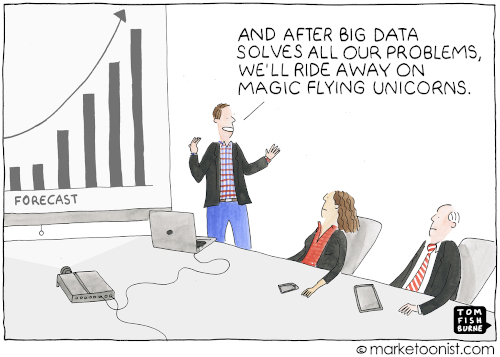

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Буду обнулять коэффициенты в самом классе RidgeSGDRegression.

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Значение $\lambda$ подобрано самостоятельно, поскольку $\theta$ улетает в $\inf$ при определенных значениях $\lambda$, lr и steps

In [76]:
X_train_scaled.shape[0]

438

Число экспериментов на обучающей выборке достаточно велико, поэтому достаточно взять в качестве размера батча значение 128.

Напишем свой класс RidgeSGDRegression стохастического градиентного спуска Ridge-регрессии.

In [77]:
class RidgeSGDRegression:
    def __init__(self, fit_intercept=True, lambd=1, lr=0.005, steps=1000):
        self.fit_intercept = fit_intercept
        self.lambd = lambd
        self.lr = lr
        self.steps = steps
        self.theta = None
        self.history = []


    def fit(self, X, Y):
        if self.fit_intercept:
            X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))

        self.theta = np.zeros(X.shape[1])

        self.history = []
        self.history.append(self.theta)

        for i in range(self.steps):
            inds = np.random.randint(0, X.shape[0], size=128)

            lambdaE = self.lambd * np.eye(self.theta.shape[0])
            if self.fit_intercept:
                lambdaE[-1, -1] = 0

            grad = 2 * ((X.shape[0] / inds.size) * X[inds].T @ X[inds] / 128 + lambdaE) @ self.theta
            grad -= 2 * (X.shape[0] / inds.size) * X[inds].T @ Y[inds] / 128

            self.theta -= self.lr * grad

            self.history.append(self.theta)

        return self


    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))

        return X @ self.theta

In [78]:
model = RidgeSGDRegression()

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитаем предсказания по всем промежуточным оценкам:

In [79]:
rmse_train = []
mae_train = []
mape_train = []

rmse_valid = []
mae_valid = []
mape_valid = []

model.fit(X_train_scaled, np.array(train[target_feature]))

# Обучаем на train
preds_train = model.predict(X_train_scaled)
history_train = model.history

# Обучаем на valid
preds_valid = model.predict(X_valid_scaled)
history_valid = model.history

# Перебираем по логу train-предсказаний
for log in history_train:
    preds_train = np.hstack((np.ones(shape=(X_train_scaled.shape[0], 1)), X_train_scaled)) @ log
    rmse_train.append(np.sqrt(((train[target_feature] - preds_train) ** 2).mean()))
    mae_train.append(metrics.mean_absolute_error(train[target_feature], preds_train))
    mape_train.append(mean_absolute_percentage_error(train[target_feature], preds_train))

# Перебираем по логу valid-предсказаний
for log in history_valid:
    preds_valid = np.hstack((np.ones(shape=(X_valid_scaled.shape[0], 1)), X_valid_scaled)) @ log
    rmse_valid.append(np.sqrt(((valid[target_feature] - preds_valid) ** 2).mean()))
    mae_valid.append(metrics.mean_absolute_error(valid[target_feature], preds_valid))
    mape_valid.append(mean_absolute_percentage_error(valid[target_feature], preds_valid))

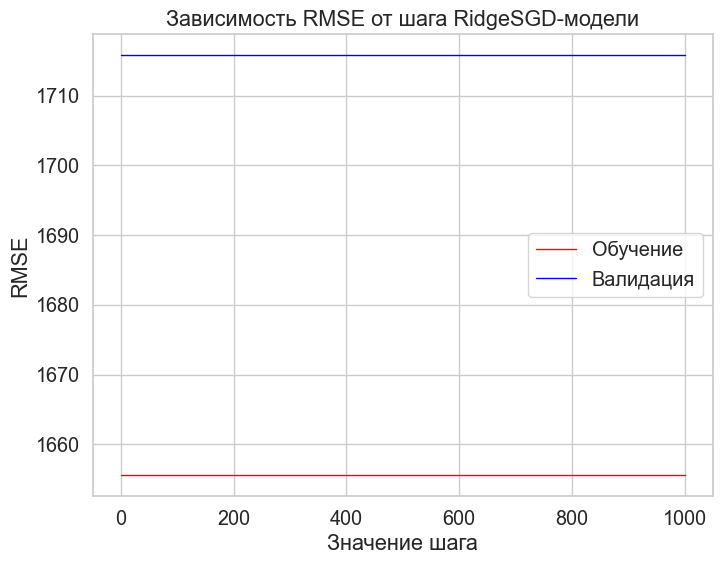

In [80]:
plt.figure(figsize=(8, 6))
grid = np.arange(1001)

plt.plot(grid, rmse_train, color='red', lw=1, label="Обучение")
plt.plot(grid, rmse_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость RMSE от шага RidgeSGD-модели")
plt.xlabel("Значение шага")
plt.ylabel("RMSE")
plt.legend()

plt.show()

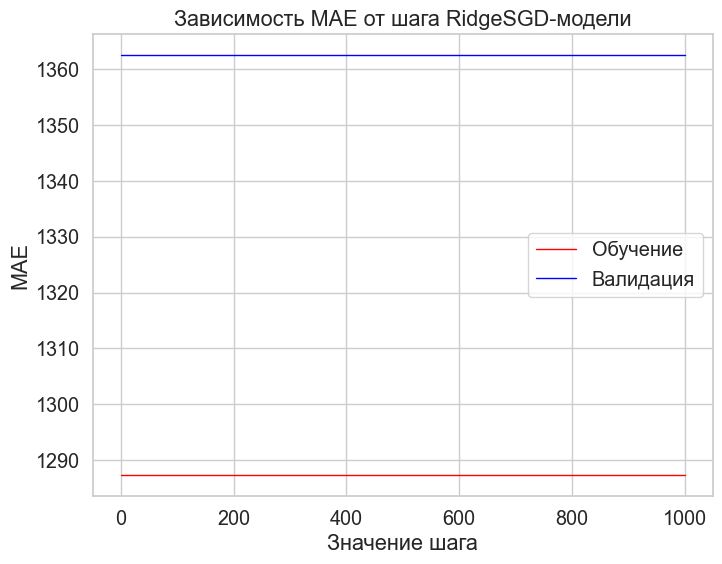

In [81]:
plt.figure(figsize=(8, 6))

plt.plot(grid, mae_train, color='red', lw=1, label="Обучение")
plt.plot(grid, mae_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость MAE от шага RidgeSGD-модели")
plt.xlabel("Значение шага")
plt.ylabel("MAE")
plt.legend()

plt.show()

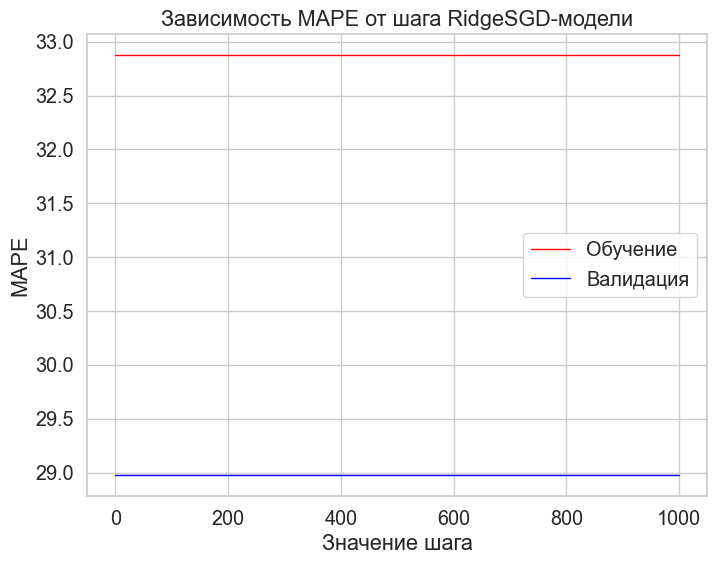

In [82]:
plt.figure(figsize=(8, 6))

plt.plot(grid, mape_train, color='red', lw=1, label="Обучение")
plt.plot(grid, mape_valid, color='b', lw=1, label="Валидация")

plt.title("Зависимость MAPE от шага RidgeSGD-модели")
plt.xlabel("Значение шага")
plt.ylabel("MAPE")
plt.legend()

plt.show()

Посчитайте ошибку на тестовой выборке.

In [83]:
test_preds = model.predict(X_test_scaled)

RMSE:

In [84]:
np.sqrt(((test[target_feature] - test_preds) ** 2).mean())

1667.8510800425588

MAE:

In [85]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1311.0192602926859

MAPE:

In [86]:
mean_absolute_percentage_error(test[target_feature], test_preds)

35.96936390033884

Сделайте выводы.

Была обучена модель стохастического градиентного спуска ridge регрессии, подобраны оптимальные параметры модели. Смотря на графики, видно, что буквально сразу значения ошибок устанавливаются в минимум. В итоге имеем приемлемое качество на тестовой выборке.